<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/main/Candy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
binary_features_cols = ["chocolate" ,
                   "fruity"    ,
                   "caramel"   ,
                   "peanutyalmondy",
                   'nougat'    ,
                   "crispedricewafer" ,
                   "hard"      ,
                   "bar"       ,
                   "pluribus"
                   ]

In [3]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [4]:
binary_features = data [binary_features_cols]
binary_features

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0
81,0,1,0,0,0,0,1,0,0
82,0,1,0,0,0,0,0,0,1
83,0,0,1,0,0,0,1,0,0


#Correlation - Pearson

In [5]:
binary_features.corr ()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585
peanutyalmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339
crispedricewafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000


#Correlation - Adjusting for Binary : Phi

In [6]:
from scipy.stats import chi2_contingency
import numpy as np
from itertools import combinations

# Recalculate the Phi coefficient for each combination of binary features
correlations = {}
for (col1, col2) in combinations(binary_features.columns, 2):
    contingency_table = pd.crosstab(binary_features[col1], binary_features[col2])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    # Phi coefficient calculation
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / n)
    correlations[(col1, col2)] = phi

# Convert the correlations dictionary to a DataFrame for better visualization
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature Pair', 'Phi Coefficient'])
correlations_df.sort_values(by='Phi Coefficient', ascending=False, inplace=True)

correlations_df.head(), correlations_df.shape


(           Feature Pair  Phi Coefficient
 0   (chocolate, fruity)         0.717858
 6      (chocolate, bar)         0.569913
 35      (bar, pluribus)         0.566115
 13        (fruity, bar)         0.487634
 28        (nougat, bar)         0.473364,
 (36, 2))

In [7]:
correlations_df.to_csv ("correlations_df_phi.csv")

#Correlation - Adjusting for Class imbalance : Association

In [8]:
# Calculate support for each combination of binary features
supports = {}
for (col1, col2) in combinations(binary_features.columns, 2):
    # Support calculation: proportion of observations where both features are 1
    support = ((binary_features[col1] == 1) & (binary_features[col2] == 1)).mean()
    supports[(col1, col2)] = support

# Convert the supports dictionary to a DataFrame for easier visualization
supports_df = pd.DataFrame(list(supports.items()), columns=['Feature Pair', 'Support'])

# Merge the support values with the Phi coefficients for a comprehensive overview
correlation_support_df = correlations_df.merge(supports_df, on='Feature Pair')
correlation_support_df.sort_values(by='Phi Coefficient', ascending=False, inplace=True)

correlation_support_df.head(), correlation_support_df.shape


(          Feature Pair  Phi Coefficient   Support
 0  (chocolate, fruity)         0.717858  0.011765
 1     (chocolate, bar)         0.569913  0.235294
 2      (bar, pluribus)         0.566115  0.000000
 3        (fruity, bar)         0.487634  0.000000
 4        (nougat, bar)         0.473364  0.082353,
 (36, 3))

In [9]:
# Initialize dictionaries for confidence and lift
confidences = {}
lifts = {}

total_observations = len(binary_features)

for (col1, col2) in combinations(binary_features.columns, 2):
    # Support of A and B together
    support_AB = ((binary_features[col1] == 1) & (binary_features[col2] == 1)).mean()
    # Support of A
    support_A = (binary_features[col1] == 1).mean()
    # Support of B
    support_B = (binary_features[col2] == 1).mean()

    # Confidence of A -> B and B -> A
    confidence_A_to_B = support_AB / support_A if support_A else 0
    confidence_B_to_A = support_AB / support_B if support_B else 0

    # Lift of A and B
    lift_AB = support_AB / (support_A * support_B) if support_A * support_B else 0

    confidences[(col1 + " -> " + col2)] = confidence_A_to_B
    confidences[(col2 + " -> " + col1)] = confidence_B_to_A
    lifts[(col1, col2)] = lift_AB

# Convert the confidence and lift dictionaries to DataFrames for better visualization
confidence_df = pd.DataFrame(list(confidences.items()), columns=['Rule', 'Confidence'])
lift_df = pd.DataFrame(list(lifts.items()), columns=['Feature Pair', 'Lift'])

# Merge confidence and lift values with the previous DataFrame
full_analysis_df = correlation_support_df.merge(confidence_df, left_on='Feature Pair', right_on='Rule', how='left')
full_analysis_df = full_analysis_df.merge(lift_df, on='Feature Pair')
full_analysis_df.drop(columns=['Rule'], inplace=True)

full_analysis_df.head(), full_analysis_df.shape


(          Feature Pair  Phi Coefficient   Support  Confidence      Lift
 0  (chocolate, fruity)         0.717858  0.011765         NaN  0.060455
 1     (chocolate, bar)         0.569913  0.235294         NaN  2.187902
 2      (bar, pluribus)         0.566115  0.000000         NaN  0.000000
 3        (fruity, bar)         0.487634  0.000000         NaN  0.000000
 4        (nougat, bar)         0.473364  0.082353         NaN  4.047619,
 (36, 5))

In [10]:
# Correctly format the confidence DataFrame to enable a proper merge
confidence_df_formatted = pd.DataFrame(list(confidences.items()), columns=['Feature Pair', 'Confidence'])

# Splitting the 'Feature Pair' column to match the format of the main DataFrame for accurate merging
confidence_df_formatted[['Feature 1', 'Feature 2']] = confidence_df_formatted['Feature Pair'].str.split(' -> ', expand=True)
confidence_df_formatted['Feature Pair'] = list(zip(confidence_df_formatted['Feature 1'], confidence_df_formatted['Feature 2']))
confidence_df_formatted.drop(['Feature 1', 'Feature 2'], axis=1, inplace=True)

# Recombine the DataFrames with the corrected structure
full_analysis_df_corrected = correlation_support_df.merge(confidence_df_formatted, on='Feature Pair')
full_analysis_df_corrected = full_analysis_df_corrected.merge(lift_df, on='Feature Pair')

full_analysis_df_corrected.head(), full_analysis_df_corrected.shape


(          Feature Pair  Phi Coefficient   Support  Confidence      Lift
 0  (chocolate, fruity)         0.717858  0.011765    0.027027  0.060455
 1     (chocolate, bar)         0.569913  0.235294    0.540541  2.187902
 2      (bar, pluribus)         0.566115  0.000000    0.000000  0.000000
 3        (fruity, bar)         0.487634  0.000000    0.000000  0.000000
 4        (nougat, bar)         0.473364  0.082353    1.000000  4.047619,
 (36, 5))

In [11]:
full_analysis_df_corrected.to_csv ("full_analysis_df_corrected.csv")

#Correlation Factoring in Sample Size : Bootstraping

In [12]:
from sklearn.utils import resample

# Define the feature pairs to analyze
feature_pairs = [('chocolate', 'fruity'), ('chocolate', 'bar'), ('nougat', 'bar')]

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize dictionaries to hold bootstrap results
bootstrap_results = {pair: {'Phi Coefficients': [], 'Supports': [], 'Confidences': [], 'Lifts': []} for pair in feature_pairs}

for _ in range(n_bootstraps):
    # Generate a bootstrap sample from the original dataset
    bootstrap_sample = resample(binary_features, n_samples=len(binary_features))

    for pair in feature_pairs:
        col1, col2 = pair
        # Calculate metrics for the bootstrap sample
        contingency_table = pd.crosstab(bootstrap_sample[col1], bootstrap_sample[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        phi = np.sqrt(chi2 / len(bootstrap_sample))
        support = ((bootstrap_sample[col1] == 1) & (bootstrap_sample[col2] == 1)).mean()
        confidence = support / bootstrap_sample[col1].mean() if bootstrap_sample[col1].mean() else 0
        lift = support / (bootstrap_sample[col1].mean() * bootstrap_sample[col2].mean()) if (bootstrap_sample[col1].mean() * bootstrap_sample[col2].mean()) else 0

        # Store the results
        bootstrap_results[pair]['Phi Coefficients'].append(phi)
        bootstrap_results[pair]['Supports'].append(support)
        bootstrap_results[pair]['Confidences'].append(confidence)
        bootstrap_results[pair]['Lifts'].append(lift)

# Calculate mean and 95% confidence intervals for each metric
bootstrap_summary = {}
for pair in feature_pairs:
    bootstrap_summary[pair] = {}
    for metric in ['Phi Coefficients', 'Supports', 'Confidences', 'Lifts']:
        metric_values = bootstrap_results[pair][metric]
        mean_value = np.mean(metric_values)
        ci_lower, ci_upper = np.percentile(metric_values, [2.5, 97.5])
        bootstrap_summary[pair][metric] = {'Mean': mean_value, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper}

bootstrap_summary


{('chocolate',
  'fruity'): {'Phi Coefficients': {'Mean': 0.7141228546018265,
   '95% CI Lower': 0.5827365556447347,
   '95% CI Upper': 0.8391756877489007}, 'Supports': {'Mean': 0.012458823529411765,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.03529411764705882}, 'Confidences': {'Mean': 0.02888639163742313,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.0975609756097561}, 'Lifts': {'Mean': 0.06322391554268778,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.1974582449628844}},
 ('chocolate',
  'bar'): {'Phi Coefficients': {'Mean': 0.5685769127035403,
   '95% CI Lower': 0.41835195643859185,
   '95% CI Upper': 0.7142401250011676}, 'Supports': {'Mean': 0.2347764705882353,
   '95% CI Lower': 0.15294117647058825,
   '95% CI Upper': 0.31794117647058795}, 'Confidences': {'Mean': 0.5403903271855388,
   '95% CI Lower': 0.3808035714285714,
   '95% CI Upper': 0.6970454545454544}, 'Lifts': {'Mean': 2.221709687995497,
   '95% CI Lower': 1.7477293539793537,
   '95% CI Upper': 2.833333333333333}},
 ('nou

In [13]:
full_analysis_df_corrected ["Feature Pair"]

0                    (chocolate, fruity)
1                       (chocolate, bar)
2                        (bar, pluribus)
3                          (fruity, bar)
4                          (nougat, bar)
5                (crispedricewafer, bar)
6               (fruity, peanutyalmondy)
7                         (fruity, hard)
8            (chocolate, peanutyalmondy)
9                  (chocolate, pluribus)
10                     (chocolate, hard)
11                     (fruity, caramel)
12         (chocolate, crispedricewafer)
13                        (caramel, bar)
14                    (fruity, pluribus)
15                     (caramel, nougat)
16                    (nougat, pluribus)
17                   (caramel, pluribus)
18                           (hard, bar)
19            (fruity, crispedricewafer)
20                      (fruity, nougat)
21                 (peanutyalmondy, bar)
22                  (chocolate, caramel)
23                   (chocolate, nougat)
24          (cri

In [14]:
from sklearn.utils import resample

# Define the feature pairs to analyze
feature_pairs = full_analysis_df_corrected ["Feature Pair"]

# Number of bootstrap samples
n_bootstraps = 1000

# Initialize dictionaries to hold bootstrap results
bootstrap_results = {pair: {'Phi Coefficients': [], 'Supports': [], 'Confidences': [], 'Lifts': []} for pair in feature_pairs}

for _ in range(n_bootstraps):
    # Generate a bootstrap sample from the original dataset
    bootstrap_sample = resample(binary_features, n_samples=len(binary_features))

    for pair in feature_pairs:
        col1, col2 = pair
        # Calculate metrics for the bootstrap sample
        contingency_table = pd.crosstab(bootstrap_sample[col1], bootstrap_sample[col2])
        chi2, _, _, _ = chi2_contingency(contingency_table)
        phi = np.sqrt(chi2 / len(bootstrap_sample))
        support = ((bootstrap_sample[col1] == 1) & (bootstrap_sample[col2] == 1)).mean()
        confidence = support / bootstrap_sample[col1].mean() if bootstrap_sample[col1].mean() else 0
        lift = support / (bootstrap_sample[col1].mean() * bootstrap_sample[col2].mean()) if (bootstrap_sample[col1].mean() * bootstrap_sample[col2].mean()) else 0

        # Store the results
        bootstrap_results[pair]['Phi Coefficients'].append(phi)
        bootstrap_results[pair]['Supports'].append(support)
        bootstrap_results[pair]['Confidences'].append(confidence)
        bootstrap_results[pair]['Lifts'].append(lift)

# Calculate mean and 95% confidence intervals for each metric
bootstrap_summary = {}
for pair in feature_pairs:
    bootstrap_summary[pair] = {}
    for metric in ['Phi Coefficients', 'Supports', 'Confidences', 'Lifts']:
        metric_values = bootstrap_results[pair][metric]
        mean_value = np.mean(metric_values)
        ci_lower, ci_upper = np.percentile(metric_values, [2.5, 97.5])
        bootstrap_summary[pair][metric] = {'Mean': mean_value, '95% CI Lower': ci_lower, '95% CI Upper': ci_upper}

bootstrap_summary


{('chocolate',
  'fruity'): {'Phi Coefficients': {'Mean': 0.7185859058225266,
   '95% CI Lower': 0.5957479656006618,
   '95% CI Upper': 0.8428097287254914}, 'Supports': {'Mean': 0.012011764705882354,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.03529411764705882}, 'Confidences': {'Mean': 0.02744895212458462,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.08571428571428572}, 'Lifts': {'Mean': 0.0608654952255295,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.18403980059385458}},
 ('chocolate',
  'bar'): {'Phi Coefficients': {'Mean': 0.5662001120736395,
   '95% CI Lower': 0.41470820563536015,
   '95% CI Upper': 0.7125978999540117}, 'Supports': {'Mean': 0.23405882352941176,
   '95% CI Lower': 0.15294117647058825,
   '95% CI Upper': 0.3176470588235294}, 'Confidences': {'Mean': 0.5377009539234499,
   '95% CI Lower': 0.3809113300492611,
   '95% CI Upper': 0.6977325581395349}, 'Lifts': {'Mean': 2.218448738747841,
   '95% CI Lower': 1.7636657908713016,
   '95% CI Upper': 2.833333333333333}},
 ('ba

In [15]:
pd.DataFrame (bootstrap_summary)

chocolate  \
                                                             fruity   
Phi Coefficients  {'Mean': 0.7185859058225266, '95% CI Lower': 0...   
Supports          {'Mean': 0.012011764705882354, '95% CI Lower':...   
Confidences       {'Mean': 0.02744895212458462, '95% CI Lower': ...   
Lifts             {'Mean': 0.0608654952255295, '95% CI Lower': 0...   

                                                                     \
                                                                bar   
Phi Coefficients  {'Mean': 0.5662001120736395, '95% CI Lower': 0...   
Supports          {'Mean': 0.23405882352941176, '95% CI Lower': ...   
Confidences       {'Mean': 0.5377009539234499, '95% CI Lower': 0...   
Lifts             {'Mean': 2.218448738747841, '95% CI Lower': 1....   

                                                                bar  \
                                                           pluribus   
Phi Coefficients  {'Mean': 0.5650636903323555, '95% CI Lower': 0...   
Supports          {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Confidences       {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Lifts             {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   

                                                             fruity  \
                                                                bar   
Phi Coefficients  {'Mean': 0.4853349977183061, '95% CI Lower': 0...   
Supports          {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Confidences       {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Lifts             {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   

                                                             nougat  \
                                                                bar   
Phi Coefficients  {'Mean': 0.4666366803533451, '95% CI Lower': 0...   
Supports          {'Mean': 0.08261176470588236, '95% CI Lower': ...   
Confidences       {'Mean': 1.0, '95% CI Lower': 1.0, '95% CI Upp...   
Lifts             {'Mean': 4.221348528200703, '95% CI Lower': 3....   

                                                   crispedricewafer  \
                                                                bar   
Phi Coefficients  {'Mean': 0.3663027415557906, '95% CI Lower': 0...   
Supports          {'Mean': 0.07052941176470588, '95% CI Lower': ...   
Confidences       {'Mean': 0.8593308003271238, '95% CI Lower': 0...   
Lifts             {'Mean': 3.6012508924515343, '95% CI Lower': 2...   

                                                             fruity  \
                                                     peanutyalmondy   
Phi Coefficients  {'Mean': 0.36602985898962154, '95% CI Lower': ...   
Supports          {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Confidences       {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   
Lifts             {'Mean': 0.0, '95% CI Lower': 0.0, '95% CI Upp...   

                                                                     \
                                                               hard   
Phi Coefficients  {'Mean': 0.36084808254429296, '95% CI Lower': ...   
Supports          {'Mean': 0.15337647058823528, '95% CI Lower': ...   
Confidences       {'Mean': 0.3425875634714174, '95% CI Lower': 0...   
Lifts             {'Mean': 1.9704905769053482, '95% CI Lower': 1...   

                                                          chocolate  \
                                                     peanutyalmondy   
Phi Coefficients  {'Mean': 0.3443861097053052, '95% CI Lower': 0...   
Supports          {'Mean': 0.1418, '95% CI Lower': 0.07058823529...   
Confidences       {'Mean': 0.3254600355157088, '95% CI Lower': 0...   
Lifts             {'Mean': 1.9943899612276241, '95% CI Lower': 1...   

                                                                     ...  \
                                                           pluribus  ...   
Phi Coefficients  {'Mean': 0.3149933302821036, '95% CI Lower': 

In [16]:
features = ['Phi Coefficients', 'Supports', 'Confidences', 'Lifts']
clustering_features_corrected  = np.array([
    [
        bootstrap_summary[pair][metric]['Mean'],
        bootstrap_summary[pair][metric]['95% CI Upper'] - bootstrap_summary[pair][metric]['95% CI Lower']
    ]
    for pair in feature_pairs
    for metric in features
]).reshape(len(feature_pairs), -1)  # Reshape so each row represents all metrics for a feature pair


In [17]:
feature_pairs

0                    (chocolate, fruity)
1                       (chocolate, bar)
2                        (bar, pluribus)
3                          (fruity, bar)
4                          (nougat, bar)
5                (crispedricewafer, bar)
6               (fruity, peanutyalmondy)
7                         (fruity, hard)
8            (chocolate, peanutyalmondy)
9                  (chocolate, pluribus)
10                     (chocolate, hard)
11                     (fruity, caramel)
12         (chocolate, crispedricewafer)
13                        (caramel, bar)
14                    (fruity, pluribus)
15                     (caramel, nougat)
16                    (nougat, pluribus)
17                   (caramel, pluribus)
18                           (hard, bar)
19            (fruity, crispedricewafer)
20                      (fruity, nougat)
21                 (peanutyalmondy, bar)
22                  (chocolate, caramel)
23                   (chocolate, nougat)
24          (cri

In [18]:
boost_strapped_df = pd.DataFrame (clustering_features_corrected ,
              columns = ['Phi Coefficients',
                         'Supports',
                         'Confidences',
                         'Lifts',
                         'CI Width Phi Coefficients' ,
                         "CI Width Supports" ,
                         "CI Width Confidences" ,
                         "CI Width Lifts"]).set_index (feature_pairs)
boost_strapped_df

,Phi Coefficients,Supports,Confidences,Lifts,CI Width Phi Coefficients,CI Width Supports,CI Width Confidences,CI Width Lifts
Feature Pair,,,,,,,,
"(chocolate, fruity)",0.718586,0.247062,0.012012,0.035294,0.027449,0.085714,0.060865,0.184040
"(chocolate, bar)",0.566200,0.297890,0.234059,0.164706,0.537701,0.316821,2.218449,1.069668
"(bar, pluribus)",0.565064,0.252715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, bar)",0.485335,0.240404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(nougat, bar)",0.466637,0.393937,0.082612,0.117647,1.000000,0.000000,4.221349,3.035714
"(crispedricewafer, bar)",0.366303,0.492453,0.070529,0.117647,0.859331,0.500000,3.601251,3.101566
"(fruity, peanutyalmondy)",0.366030,0.230193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, hard)",0.360848,0.399982,0.153376,0.152941,0.342588,0.306452,1.970491,1.119008
"(chocolate, peanutyalmondy)",0.344386,0.363084,0.141800,0.152941,0.325460,0.305458,1.994390,1.156250


In [19]:
boost_strapped_df.to_csv ("boost_strapped_df.csv")

In [20]:
boost_strapped_df.corr ()

,Phi Coefficients,Supports,Confidences,Lifts,CI Width Phi Coefficients,CI Width Supports,CI Width Confidences,CI Width Lifts
Phi Coefficients,1.000000,0.253579,0.238262,0.168918,0.205573,-0.183750,0.146846,-0.140057
Supports,0.253579,1.000000,0.459840,0.675975,0.623644,0.683004,0.742604,0.621416
Confidences,0.238262,0.459840,1.000000,0.899269,0.686801,0.413443,0.476668,0.099590
Lifts,0.168918,0.675975,0.899269,1.000000,0.785461,0.659106,0.695219,0.359071
CI Width Phi Coefficients,0.205573,0.623644,0.686801,0.785461,1.000000,0.533472,0.781613,0.410066
CI Width Supports,-0.183750,0.683004,0.413443,0.659106,0.533472,1.000000,0.557893,0.613468
CI Width Confidences,0.146846,0.742604,0.476668,0.695219,0.781613,0.557893,1.000000,0.783089
CI Width Lifts,-0.140057,0.621416,0.099590,0.359071,0.410066,0.613468,0.783089,1.000000


In [21]:
boost_strapped_df.drop (["Lifts" , "CI Width Lifts" , "CI Width Confidences"],axis = 1).corr ()

,Phi Coefficients,Supports,Confidences,CI Width Phi Coefficients,CI Width Supports
Phi Coefficients,1.000000,0.253579,0.238262,0.205573,-0.183750
Supports,0.253579,1.000000,0.459840,0.623644,0.683004
Confidences,0.238262,0.459840,1.000000,0.686801,0.413443
CI Width Phi Coefficients,0.205573,0.623644,0.686801,1.000000,0.533472
CI Width Supports,-0.183750,0.683004,0.413443,0.533472,1.000000


#Data Clustering : Dendogram

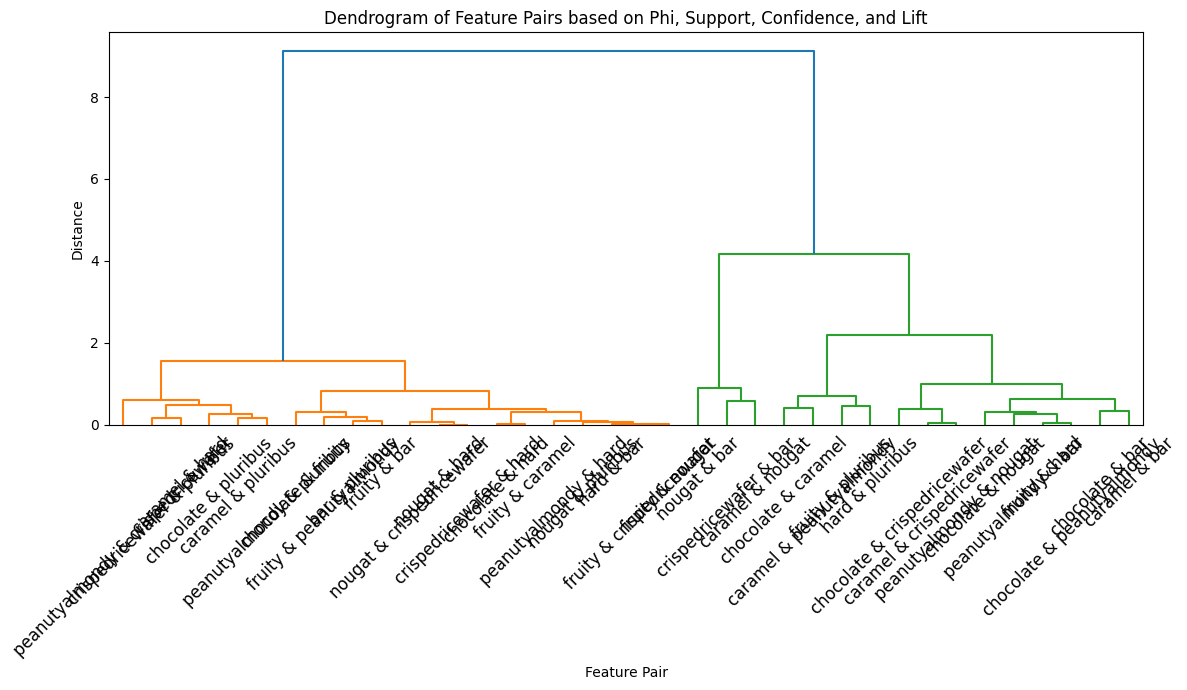

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Prepare the data: Extract mean values of metrics for each feature pair
features = ['Phi Coefficients', 'Supports', 'Confidences', 'Lifts']
data_for_clustering = pd.DataFrame([
    {**{'Feature Pair': f"{pair[0]} & {pair[1]}"},
     **{feature: bootstrap_summary[pair][feature]['Mean'] for feature in features}}
    for pair in feature_pairs
])

# Prepare the matrix (rows: feature pairs, columns: metrics)
clustering_matrix = data_for_clustering.drop('Feature Pair', axis=1)

# Compute the distance matrix using linkage
Z = linkage(clustering_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, labels=data_for_clustering['Feature Pair'].values, leaf_rotation=45., leaf_font_size=12.)
plt.title('Dendrogram of Feature Pairs based on Phi, Support, Confidence, and Lift')
plt.xlabel('Feature Pair')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


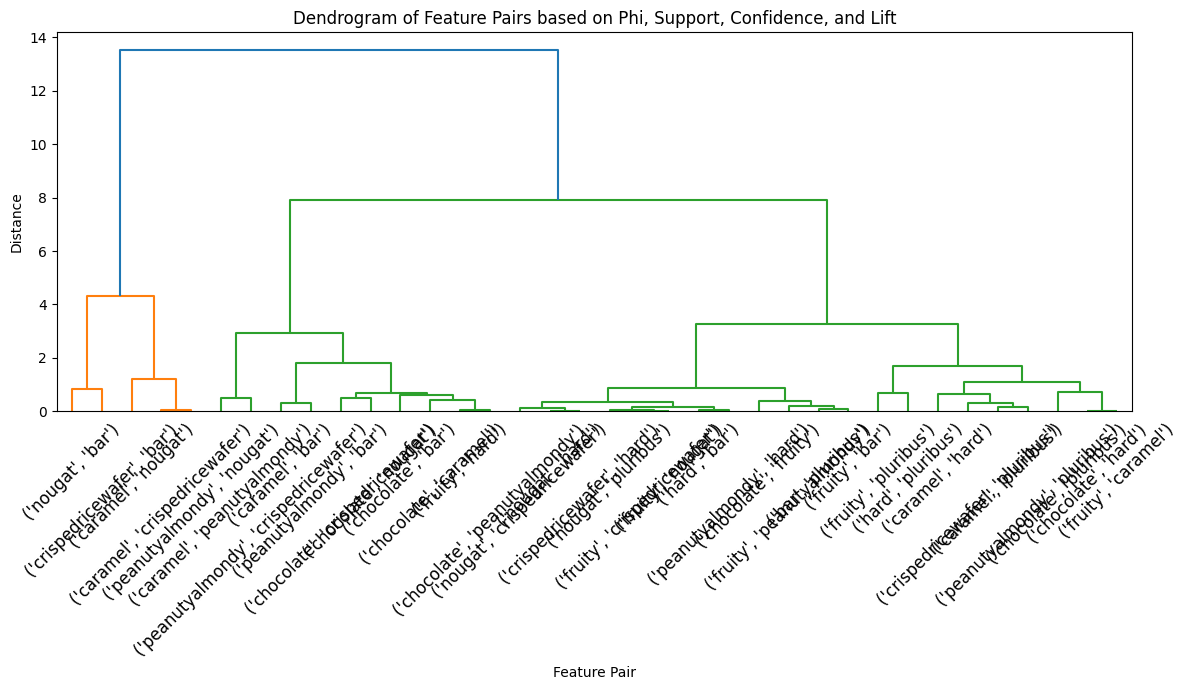

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Prepare the data: Extract mean values of metrics for each feature pair
features = ['Phi Coefficients', 'Supports', 'Confidences', 'Lifts']
data_for_clustering = boost_strapped_df.copy(deep = True)

# Prepare the matrix (rows: feature pairs, columns: metrics)
clustering_matrix = data_for_clustering

# Compute the distance matrix using linkage
Z = linkage(clustering_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, labels=data_for_clustering.index, leaf_rotation=45., leaf_font_size=12.)
plt.title('Dendrogram of Feature Pairs based on Phi, Support, Confidence, and Lift')
plt.xlabel('Feature Pair')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


#Clustering : kMeans

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Data preparation: Use mean values and the width of their 95% CI as features
clustering_features = []
for pair, metrics in bootstrap_summary.items():
    for metric, values in metrics.items():
        mean_value = values['Mean']
        ci_width = values['95% CI Upper'] - values['95% CI Lower']
        clustering_features.append([mean_value, ci_width])

# Convert to a numpy array for clustering
clustering_features = np.array(clustering_features)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 7):  # Test a range of cluster numbers
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(clustering_features)
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Select the number of clusters with the highest silhouette score
optimal_n_clusters = sorted(silhouette_scores, key=lambda x: x[1], reverse=True)[0][0]

silhouette_scores, optimal_n_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([(2, 0.8235537556610397),
  (3, 0.7926914649092774),
  (4, 0.80145726198577),
  (5, 0.5785407302428665),
  (6, 0.5849248753587166)],
 2)

In [25]:
bootstrap_summary

{('chocolate',
  'fruity'): {'Phi Coefficients': {'Mean': 0.7185859058225266,
   '95% CI Lower': 0.5957479656006618,
   '95% CI Upper': 0.8428097287254914}, 'Supports': {'Mean': 0.012011764705882354,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.03529411764705882}, 'Confidences': {'Mean': 0.02744895212458462,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.08571428571428572}, 'Lifts': {'Mean': 0.0608654952255295,
   '95% CI Lower': 0.0,
   '95% CI Upper': 0.18403980059385458}},
 ('chocolate',
  'bar'): {'Phi Coefficients': {'Mean': 0.5662001120736395,
   '95% CI Lower': 0.41470820563536015,
   '95% CI Upper': 0.7125978999540117}, 'Supports': {'Mean': 0.23405882352941176,
   '95% CI Lower': 0.15294117647058825,
   '95% CI Upper': 0.3176470588235294}, 'Confidences': {'Mean': 0.5377009539234499,
   '95% CI Lower': 0.3809113300492611,
   '95% CI Upper': 0.6977325581395349}, 'Lifts': {'Mean': 2.218448738747841,
   '95% CI Lower': 1.7636657908713016,
   '95% CI Upper': 2.833333333333333}},
 ('ba

In [26]:
feature_pairs

0                    (chocolate, fruity)
1                       (chocolate, bar)
2                        (bar, pluribus)
3                          (fruity, bar)
4                          (nougat, bar)
5                (crispedricewafer, bar)
6               (fruity, peanutyalmondy)
7                         (fruity, hard)
8            (chocolate, peanutyalmondy)
9                  (chocolate, pluribus)
10                     (chocolate, hard)
11                     (fruity, caramel)
12         (chocolate, crispedricewafer)
13                        (caramel, bar)
14                    (fruity, pluribus)
15                     (caramel, nougat)
16                    (nougat, pluribus)
17                   (caramel, pluribus)
18                           (hard, bar)
19            (fruity, crispedricewafer)
20                      (fruity, nougat)
21                 (peanutyalmondy, bar)
22                  (chocolate, caramel)
23                   (chocolate, nougat)
24          (cri

In [27]:
feature_pairs

0                    (chocolate, fruity)
1                       (chocolate, bar)
2                        (bar, pluribus)
3                          (fruity, bar)
4                          (nougat, bar)
5                (crispedricewafer, bar)
6               (fruity, peanutyalmondy)
7                         (fruity, hard)
8            (chocolate, peanutyalmondy)
9                  (chocolate, pluribus)
10                     (chocolate, hard)
11                     (fruity, caramel)
12         (chocolate, crispedricewafer)
13                        (caramel, bar)
14                    (fruity, pluribus)
15                     (caramel, nougat)
16                    (nougat, pluribus)
17                   (caramel, pluribus)
18                           (hard, bar)
19            (fruity, crispedricewafer)
20                      (fruity, nougat)
21                 (peanutyalmondy, bar)
22                  (chocolate, caramel)
23                   (chocolate, nougat)
24          (cri

In [28]:
# Correct the structure for clustering: Each feature pair should be a single row with all metrics and CI widths
clustering_features_corrected = boost_strapped_df.drop (["Lifts" , "CI Width Lifts" , "CI Width Confidences"],axis = 1).values

# Perform K-Means clustering again with the corrected structure
kmeans = KMeans (optimal_n_clusters)
cluster_labels_corrected = kmeans.fit_predict(clustering_features_corrected )

# Add corrected cluster labels to a simplified DataFrame for analysis
simplified_data_for_clustering = pd.DataFrame([
    {
        'Feature Pair': pair,

        'Cluster': label
    }
    for pair, label in zip(feature_pairs, cluster_labels_corrected)
])

# Display the simplified DataFrame with feature pairs and their cluster labels
simplified_data_for_clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Feature Pair,Cluster
0,"(chocolate, fruity)",1
1,"(chocolate, bar)",0
2,"(bar, pluribus)",1
3,"(fruity, bar)",1
4,"(nougat, bar)",0
5,"(crispedricewafer, bar)",0
6,"(fruity, peanutyalmondy)",1
7,"(fruity, hard)",0
8,"(chocolate, peanutyalmondy)",0
9,"(chocolate, pluribus)",0


array([[<Axes: title={'center': 'Cluster'}>]], dtype=object)

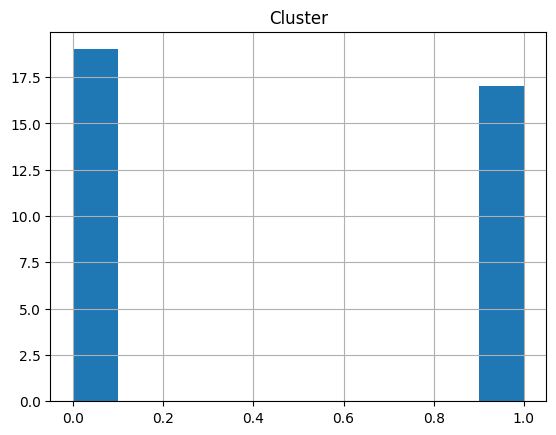

In [29]:
simplified_data_for_clustering.hist ()


#Clustering : kMeans - ShapValues

In [35]:
#!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00


In [36]:
cluster_labels_corrected

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [37]:
boost_strapped_df.columns

Index(['Phi Coefficients', 'Supports', 'Confidences', 'Lifts',
       'CI Width Phi Coefficients', 'CI Width Supports',
       'CI Width Confidences', 'CI Width Lifts'],
      dtype='object')

In [38]:
boost_strapped_df

,Phi Coefficients,Supports,Confidences,Lifts,CI Width Phi Coefficients,CI Width Supports,CI Width Confidences,CI Width Lifts
Feature Pair,,,,,,,,
"(chocolate, fruity)",0.718586,0.247062,0.012012,0.035294,0.027449,0.085714,0.060865,0.184040
"(chocolate, bar)",0.566200,0.297890,0.234059,0.164706,0.537701,0.316821,2.218449,1.069668
"(bar, pluribus)",0.565064,0.252715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, bar)",0.485335,0.240404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(nougat, bar)",0.466637,0.393937,0.082612,0.117647,1.000000,0.000000,4.221349,3.035714
"(crispedricewafer, bar)",0.366303,0.492453,0.070529,0.117647,0.859331,0.500000,3.601251,3.101566
"(fruity, peanutyalmondy)",0.366030,0.230193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, hard)",0.360848,0.399982,0.153376,0.152941,0.342588,0.306452,1.970491,1.119008
"(chocolate, peanutyalmondy)",0.344386,0.363084,0.141800,0.152941,0.325460,0.305458,1.994390,1.156250


In [39]:
from xgboost import XGBClassifier

import shap

# Assuming `clustering_features_corrected` as our features and `cluster_labels_corrected` as our targets
X = clustering_features_corrected
X = boost_strapped_df.drop (["Lifts" , "CI Width Lifts" , "CI Width Confidences"],axis = 1)
#X = boost_strapped_df.copy (deep = True)
y = cluster_labels_corrected

# Train a Gradient Boosting Classifier
model = XGBClassifier(random_state=42)
model.fit(X, y)

print (model.score (X,y))

# Initialize JS visualization in the notebook for SHAP
shap.initjs()

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Since we have a binary classification (2 clusters), shap_values[1] gives the SHAP values for the positive class
# Let's visualize the summary plot for the first class (cluster)
#shap.summary_plot(shap_values, X, feature_names=boost_strapped_df.drop (["Lifts" , "CI Width Lifts" , "CI Width Confidences"],axis = 1).columns)


1.0


In [40]:
shap_values

array([[ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        ,  0.24388704,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        , -0.22522163,  0.        , -1.8290954 ,  0.9804356 ],
       [ 0.        , -0.22522163,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        , -0.22522163,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        , -0.22522163,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        , -0.22522163,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        ,  0.24388704,  0.        ,  1.8427036 ,  0.9804356 ],
       [ 0.        , -0.01173217,  0.        , -1.8290954 , -1.1192992 ],
       [ 0.        , -0.22522163,  0. 

In [41]:
import pandas as pd

# Example to construct the DataFrame assuming 'predicted_clusters' holds the predicted cluster for each observation
num_observations = shap_values.shape[0]  # Number of observations
num_features = 8  # Number of features

# Initialize an empty DataFrame for SHAP values
shap_df = pd.DataFrame(columns=[ str(f) for f in boost_strapped_df.drop (["Lifts" , "CI Width Lifts" , "CI Width Confidences"],axis = 1).columns] + ['Cluster'])

for i in range(num_observations):
    print (i)
    cluster = y[i]  # Get the predicted cluster for the observation
    # Assuming 'shap_values' is a list of arrays, with one array per cluster
    shap_array_for_cluster = shap_values [i]  # Get SHAP values for the observation, in its predicted cluster
    # Append to the DataFrame
    shap_df.loc[i,:] = list(shap_array_for_cluster) + [cluster]

print(shap_df.head())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
  Phi Coefficients  Supports Confidences CI Width Phi Coefficients  \
0              0.0  0.243887         0.0                  1.842704   
1              0.0  0.243887         0.0                 -1.829095   
2              0.0  0.243887         0.0                  1.842704   
3              0.0  0.243887         0.0                  1.842704   
4              0.0 -0.225222         0.0                 -1.829095   

  CI Width Supports Cluster  
0          0.980436       1  
1         -1.119299       0  
2          0.980436       1  
3          0.980436       1  
4          0.980436       0  


In [42]:
data[(data['fruity'] == 1) & (data['bar'] == 1)].shape[0]

0

In [43]:
from sklearn.model_selection import cross_val_predict, KFold , LeaveOneOut , cross_val_score

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Compute accuracy scores (proportion of correct predictions)
accuracy_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy', n_jobs=-1)

# Compute the overall accuracy by averaging the individual accuracy scores
overall_accuracy = accuracy_scores.mean()

print(f"Overall Accuracy: {overall_accuracy:.4f}")


# Initialize 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv = LeaveOneOut ()
# Get predicted probabilities for each class, for each fold
predicted_probs = cross_val_predict(model, X, y, cv=cv, method='predict_proba', n_jobs=-1)
predictions     = cross_val_predict(model, X, y, cv=cv, method='predict', n_jobs=-1)
print(predicted_probs)



pd.DataFrame (predicted_probs).set_index (boost_strapped_df.index)

Overall Accuracy: 0.8889
[[0.05416912 0.9458309 ]
 [0.9531211  0.04687889]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.05981153 0.94018847]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.06961417 0.9303858 ]
 [0.23704684 0.76295316]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.94665545 0.05334457]
 [0.05981153 0.94018847]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.96402174 0.03597824]
 [0.96402174 0.03597824]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.9531211  0.04687889]
 [0.05416912 0.9458309 ]
 [0.05416912 0.9458309 ]
 [0.9531211  0.04687889]]


,0,1
Feature Pair,,
"(chocolate, fruity)",0.054169,0.945831
"(chocolate, bar)",0.953121,0.046879
"(bar, pluribus)",0.054169,0.945831
"(fruity, bar)",0.054169,0.945831
"(nougat, bar)",0.059812,0.940188
"(crispedricewafer, bar)",0.964022,0.035978
"(fruity, peanutyalmondy)",0.054169,0.945831
"(fruity, hard)",0.964022,0.035978
"(chocolate, peanutyalmondy)",0.964022,0.035978


In [44]:
final_df = shap_df.set_index (boost_strapped_df.index).join (pd.DataFrame (predicted_probs).set_index (boost_strapped_df.index)).join (pd.DataFrame (predictions,columns = ["pred"]).set_index (boost_strapped_df.index))
final_df

,Phi Coefficients,Supports,Confidences,CI Width Phi Coefficients,CI Width Supports,Cluster,0,1,pred
Feature Pair,,,,,,,,,
"(chocolate, fruity)",0.0,0.243887,0.0,1.842704,0.980436,1,0.054169,0.945831,1
"(chocolate, bar)",0.0,0.243887,0.0,-1.829095,-1.119299,0,0.953121,0.046879,0
"(bar, pluribus)",0.0,0.243887,0.0,1.842704,0.980436,1,0.054169,0.945831,1
"(fruity, bar)",0.0,0.243887,0.0,1.842704,0.980436,1,0.054169,0.945831,1
"(nougat, bar)",0.0,-0.225222,0.0,-1.829095,0.980436,0,0.059812,0.940188,1
"(crispedricewafer, bar)",0.0,-0.225222,0.0,-1.829095,-1.119299,0,0.964022,0.035978,0
"(fruity, peanutyalmondy)",0.0,0.243887,0.0,1.842704,0.980436,1,0.054169,0.945831,1
"(fruity, hard)",0.0,-0.225222,0.0,-1.829095,-1.119299,0,0.964022,0.035978,0
"(chocolate, peanutyalmondy)",0.0,-0.225222,0.0,-1.829095,-1.119299,0,0.964022,0.035978,0


In [45]:
final_df = boost_strapped_df.join (pd.DataFrame (y,columns = ["Clusters"]).set_index (boost_strapped_df.index) ).join (pd.DataFrame (predicted_probs).set_index (boost_strapped_df.index)).join (pd.DataFrame (predictions,columns = ["pred"]).set_index (boost_strapped_df.index))
final_df

,Phi Coefficients,Supports,Confidences,Lifts,CI Width Phi Coefficients,CI Width Supports,CI Width Confidences,CI Width Lifts,Clusters,0,1,pred
Feature Pair,,,,,,,,,,,,
"(chocolate, fruity)",0.718586,0.247062,0.012012,0.035294,0.027449,0.085714,0.060865,0.184040,1,0.054169,0.945831,1
"(chocolate, bar)",0.566200,0.297890,0.234059,0.164706,0.537701,0.316821,2.218449,1.069668,0,0.953121,0.046879,0
"(bar, pluribus)",0.565064,0.252715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.054169,0.945831,1
"(fruity, bar)",0.485335,0.240404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.054169,0.945831,1
"(nougat, bar)",0.466637,0.393937,0.082612,0.117647,1.000000,0.000000,4.221349,3.035714,0,0.059812,0.940188,1
"(crispedricewafer, bar)",0.366303,0.492453,0.070529,0.117647,0.859331,0.500000,3.601251,3.101566,0,0.964022,0.035978,0
"(fruity, peanutyalmondy)",0.366030,0.230193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.054169,0.945831,1
"(fruity, hard)",0.360848,0.399982,0.153376,0.152941,0.342588,0.306452,1.970491,1.119008,0,0.964022,0.035978,0
"(chocolate, peanutyalmondy)",0.344386,0.363084,0.141800,0.152941,0.325460,0.305458,1.994390,1.156250,0,0.964022,0.035978,0


In [46]:
final_df.to_csv ("final_df.csv")

In [47]:
boost_strapped_df

,Phi Coefficients,Supports,Confidences,Lifts,CI Width Phi Coefficients,CI Width Supports,CI Width Confidences,CI Width Lifts
Feature Pair,,,,,,,,
"(chocolate, fruity)",0.718586,0.247062,0.012012,0.035294,0.027449,0.085714,0.060865,0.184040
"(chocolate, bar)",0.566200,0.297890,0.234059,0.164706,0.537701,0.316821,2.218449,1.069668
"(bar, pluribus)",0.565064,0.252715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, bar)",0.485335,0.240404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(nougat, bar)",0.466637,0.393937,0.082612,0.117647,1.000000,0.000000,4.221349,3.035714
"(crispedricewafer, bar)",0.366303,0.492453,0.070529,0.117647,0.859331,0.500000,3.601251,3.101566
"(fruity, peanutyalmondy)",0.366030,0.230193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(fruity, hard)",0.360848,0.399982,0.153376,0.152941,0.342588,0.306452,1.970491,1.119008
"(chocolate, peanutyalmondy)",0.344386,0.363084,0.141800,0.152941,0.325460,0.305458,1.994390,1.156250


In [48]:
fruity_and_bar_count = data[(data['bar'] == 1) & (data['nougat'] == 1)].shape[0]
print(fruity_and_bar_count)


7
